# Меня ждут миллионы

Обучите простую модель предсказания цены акций. Используйте один из рассмотренных на лекции "Временные последовательности" алгоритмов предсказания рядов. Можно использовать и более сложные алгоритмы предсказания рядов


1. Найдите данные о цене любого биржевого актива

    Данные должны содержать значение цены актива как минимум за каждый день и длительностю как минимум за год. 

    Найти данные можно на kaggle или использовать FAANG датасет из 1 лабораторной


2. Предобработайте данные

    Временной ряд сложно предсказывать по дням. Сделайте ряд по неделям или месяцам
   
    Удалите из ряда тренд, если он есть. Используйте другие рассмотренные на лекции приёмы


3. Обучите модель
    
    Обучите модель на 80% временного ряда
    
    Предскажите оставшиеся 20% (как минимум 3 точки) ряда с помощью модели 
    
    Отобразите на графике предсказание модели и истинные данные


4. Посчитайте метрику

    Метрика должна отражать разницу между предсказанными и истинными данными. Можно выбрать меру MAPE, можно предложить свою

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Amazon_Historical_StockPrice2.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-28,584.400024,584.750000,575.559998,579.869995,579.869995,3121500
1,2016-03-29,580.150024,595.849976,576.500000,593.859985,593.859985,4392600
2,2016-03-30,596.710022,603.239990,595.000000,598.690002,598.690002,3890500
3,2016-03-31,599.280029,600.750000,592.210022,593.640015,593.640015,2681800
4,2016-04-01,590.489990,599.030029,588.299988,598.500000,598.500000,2917400


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1260 non-null   object 
 1   Open       1260 non-null   float64
 2   High       1260 non-null   float64
 3   Low        1260 non-null   float64
 4   Close      1260 non-null   float64
 5   Adj Close  1260 non-null   float64
 6   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-28,584.400024,584.750000,575.559998,579.869995,579.869995,3121500
1,2016-03-29,580.150024,595.849976,576.500000,593.859985,593.859985,4392600
2,2016-03-30,596.710022,603.239990,595.000000,598.690002,598.690002,3890500
3,2016-03-31,599.280029,600.750000,592.210022,593.640015,593.640015,2681800
4,2016-04-01,590.489990,599.030029,588.299988,598.500000,598.500000,2917400


In [6]:
df = df.drop(['Volume', 'Adj Close'], axis = 1)


In [7]:
df.head()

,Date,Open,High,Low,Close
0,2016-03-28,584.400024,584.750000,575.559998,579.869995
1,2016-03-29,580.150024,595.849976,576.500000,593.859985
2,2016-03-30,596.710022,603.239990,595.000000,598.690002
3,2016-03-31,599.280029,600.750000,592.210022,593.640015
4,2016-04-01,590.489990,599.030029,588.299988,598.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1260 non-null   object 
 1   Open    1260 non-null   float64
 2   High    1260 non-null   float64
 3   Low     1260 non-null   float64
 4   Close   1260 non-null   float64
dtypes: float64(4), object(1)
memory usage: 49.3+ KB


In [9]:
dfN = df.head(1)

def yearMonth (s: str) -> str:
    
    return s[:-3]

date = yearMonth(dfN.Date[0])
openAcc = dfN.Open[0]
highAcc = dfN.High[0]
lowAcc = dfN.Low[0]
closeAcc = dfN.Close[0]

In [10]:

def func(x):
    global date
    global highAcc
    global lowAcc
    global closeAcc
    global dfN
    global openAcc
    
    if (x[0].startswith(date)):
        highAcc = max (highAcc, x[2])
        lowAcc = min (lowAcc, x[3])
        closeAcc = x[4]
    else:
        dfN = dfN.append({'Date': date, 'Open': openAcc, 'High': highAcc, 'Low': lowAcc, 'Close': closeAcc},
                         ignore_index = True)
        openAcc = x[1]
        date = yearMonth(x[0])
        
    return x 

In [11]:
df.apply(func, axis = 1)
dfN = dfN.append({'Date': date, 'Open': openAcc, 'High': highAcc, 'Low': lowAcc, 'Close': closeAcc},
                         ignore_index = True)

In [12]:
dfN.last

<bound method NDFrame.last of           Date         Open        High         Low        Close
0   2016-03-28   584.400024   584.75000  575.559998   579.869995
1      2016-03   584.400024   603.23999  575.559998   593.640015
2      2016-04   590.489990   669.97998  575.559998   659.590027
3      2016-05   663.919983   724.22998  575.559998   722.789978
4      2016-06   720.900024   731.50000  575.559998   715.619995
..         ...          ...         ...         ...          ...
57     2020-11  3061.739990  3552.25000  575.559998  3168.040039
58     2020-12  3188.500000  3552.25000  575.559998  3256.929932
59     2021-01  3270.000000  3552.25000  575.559998  3206.199951
60     2021-02  3242.360107  3552.25000  575.559998  3092.929932
61     2021-03  3127.889893  3552.25000  575.559998  3052.030029

[62 rows x 5 columns]>

In [13]:
dfN = dfN.drop(0)

In [14]:
dfN.head()

,Date,Open,High,Low,Close
1,2016-03,584.400024,603.23999,575.559998,593.640015
2,2016-04,590.489990,669.97998,575.559998,659.590027
3,2016-05,663.919983,724.22998,575.559998,722.789978
4,2016-06,720.900024,731.50000,575.559998,715.619995
5,2016-07,717.320007,766.00000,575.559998,758.809998


<AxesSubplot:>

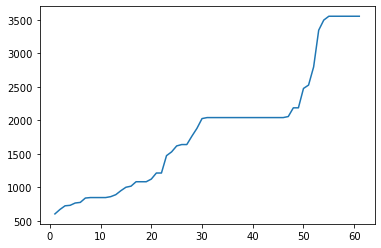

In [15]:
dfN.High.plot()

<AxesSubplot:>

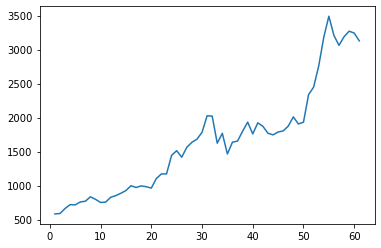

In [16]:
dfN.Open.plot()

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
p_value = adfuller(dfN.Open)[1]
print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!'
)

Полученный уровень значимости (p-value): 0.9488. 0.9488 > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!


In [19]:
dfN['OpenDiff_1'] =  dfN.Open.diff()

In [20]:
dfN.head()

,Date,Open,High,Low,Close,OpenDiff_1
1,2016-03,584.400024,603.23999,575.559998,593.640015,NaN
2,2016-04,590.489990,669.97998,575.559998,659.590027,6.089966
3,2016-05,663.919983,724.22998,575.559998,722.789978,73.429993
4,2016-06,720.900024,731.50000,575.559998,715.619995,56.980042
5,2016-07,717.320007,766.00000,575.559998,758.809998,-3.580017


<AxesSubplot:>

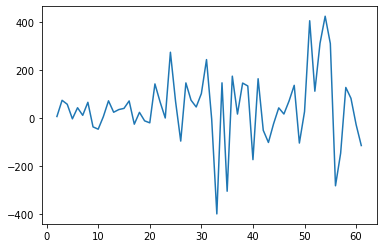

In [21]:
dfN.OpenDiff_1.plot()

In [22]:
p_value = adfuller(dfN.OpenDiff_1[1:])[1]

print(
    f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
    f'{round(p_value, 4)} < 0.05. Нулевая гипотеза отвергается в пользу альтернативной!'
)

Полученный уровень значимости (p-value): 0.0. 0.0 < 0.05. Нулевая гипотеза отвергается в пользу альтернативной!


In [23]:
import numpy as np
dfN['Openlog']= np.log(dfN.Open)

In [24]:
dfN['OpenlogDiff_1'] = dfN.Openlog.diff()

In [25]:
dfN.head()

,Date,Open,High,Low,Close,OpenDiff_1,Openlog,OpenlogDiff_1
1,2016-03,584.400024,603.23999,575.559998,593.640015,NaN,6.370586,NaN
2,2016-04,590.489990,669.97998,575.559998,659.590027,6.089966,6.380953,0.010367
3,2016-05,663.919983,724.22998,575.559998,722.789978,73.429993,6.498162,0.117209
4,2016-06,720.900024,731.50000,575.559998,715.619995,56.980042,6.580500,0.082339
5,2016-07,717.320007,766.00000,575.559998,758.809998,-3.580017,6.575522,-0.004978


<AxesSubplot:>

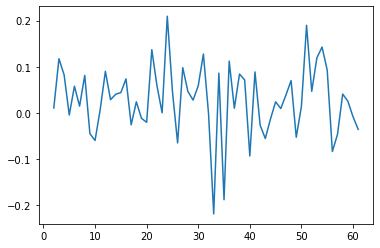

In [26]:
dfN['OpenlogDiff_1'].plot()

<AxesSubplot:>

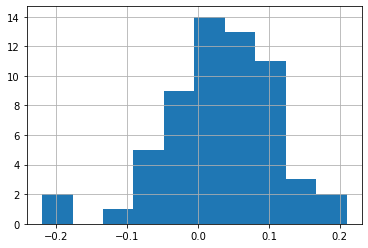

In [27]:
dfN['OpenlogDiff_1'].hist()

In [28]:
dfN['Date'] = pd.to_datetime(dfN['Date'])

In [29]:
dfN = dfN.set_index(['Date'])

In [30]:
dfN = dfN.drop(['High', 'Low', 'Close', 'Open', 'Openlog', 'OpenlogDiff_1'], axis=1)

In [31]:
dfN = dfN.dropna()

In [32]:
dfN.head(71)

,OpenDiff_1
Date,
2016-04-01,6.089966
2016-05-01,73.429993
2016-06-01,56.980042
2016-07-01,-3.580017
2016-08-01,42.549988
2016-09-01,11.030029
2016-10-01,65.099976
2016-11-01,-37.000000
2016-12-01,-46.590027


<AxesSubplot:>

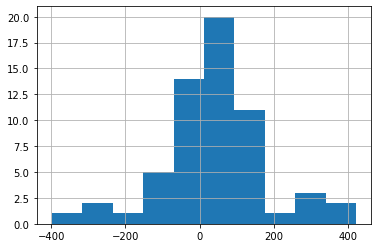

In [33]:
dfN['OpenDiff_1'].hist()

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [35]:
#decomposition = seasonal_decompose(dfN['OpenDiff_1'])

In [36]:
import statsmodels

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

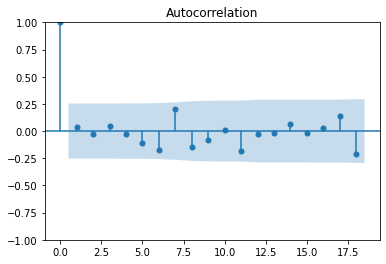

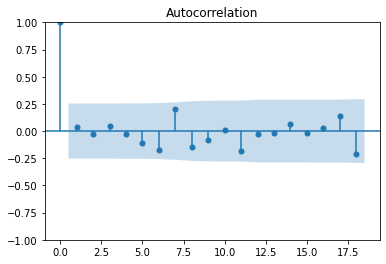

In [38]:
statsmodels.graphics.tsaplots.plot_acf(dfN['OpenDiff_1'])

C:\Users\User\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


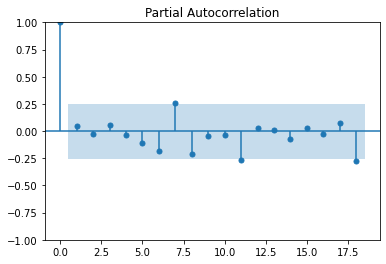

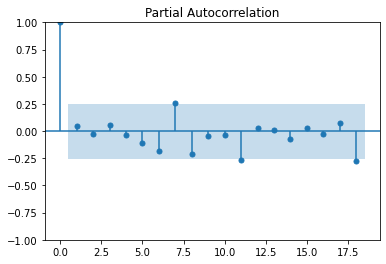

In [39]:
statsmodels.graphics.tsaplots.plot_pacf(dfN['OpenDiff_1'])

In [40]:
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [41]:
X = dfN.to_numpy()[:48]

In [42]:
X

array([[ 6.08996582e+00],
       [ 7.34299927e+01],
       [ 5.69800415e+01],
       [-3.58001709e+00],
       [ 4.25499878e+01],
       [ 1.10300293e+01],
       [ 6.50999756e+01],
       [-3.70000000e+01],
       [-4.65900269e+01],
       [ 5.51000977e+00],
       [ 7.12900391e+01],
       [ 2.38399658e+01],
       [ 3.49500122e+01],
       [ 3.97999878e+01],
       [ 7.07900391e+01],
       [-2.58000488e+01],
       [ 2.33200073e+01],
       [-1.19099731e+01],
       [-2.02000122e+01],
       [ 1.41400024e+02],
       [ 6.66500244e+01],
       [-5.00488281e-02],
       [ 2.73000000e+02],
       [ 6.85999756e+01],
       [-9.59799805e+01],
       [ 1.45599976e+02],
       [ 7.38100586e+01],
       [ 4.56699219e+01],
       [ 1.01300049e+02],
       [ 2.42500000e+02],
       [-4.51000977e+00],
       [-3.98459961e+02],
       [ 1.45929932e+02],
       [-3.04260010e+02],
       [ 1.73680054e+02],
       [ 1.62500000e+01],
       [ 1.44979980e+02],
       [ 1.32979980e+02],
       [-1.7

In [43]:
p = range(1, 20)
q = range(1, 20)

In [44]:
from itertools import product
parameters = product(p, q)
parameters_list = list(parameters)
len(parameters_list)

361

In [45]:
X_train, X_test = train_test_split(dfN['OpenDiff_1'], test_size=0.2, shuffle=False)

In [46]:
X_train.shape, X_test.shape

((48,), (12,))

In [47]:
#from statsmodels.tsa.arima_model import ARMA --deprecated
#Обратная совместимость им чужда

In [48]:
%%time
#warnings.filterwarnings('ignore')

#arma = ARMA(X_train, order=(p, q)).fit()
results = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    try:
        model = ARIMA(
            X_train, 
            order=(param[0], 0, param[1]),
            enforce_stationarity=False  #Schur decomposition solver error
        ).fit()
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])


  0%|                                                                                          | 0/361 [00:00<?, ?it/s]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
  0%|▏                                                                                 | 1/361 [00:00<00:50,  7.14it/s]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No freq

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  2%|██                                                                                | 9/361 [00:05<04:32,  1.29it/s]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  4%|███▎                                                                             | 15/361 [00:12<06:20,  1.10s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

  6%|████▉                                                                            | 22/361 [00:39<13:19,  2.36s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
  8%|██████▋                                                                          | 30/361 [00:47<06:35,  1.19s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 10%|████████                                                                         | 36/361 [00:55<10:15,  1.89s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 12%|█████████▊                                                                       | 44/361 [01:06<05:22,  1.02s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 14%|███████████▍                                                                     | 51/361 [01:13<04:27,  1.16it/s]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

 16%|████████████▊                                                                    | 57/361 [01:36<22:05,  4.36s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
 16%|█████████████                                                                    | 58/361 [01:37<15:46,  3.12s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No freq

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 18%|██████████████▊                                                                  | 66/361 [01:42<04:35,  1.07it/s]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 20%|████████████████▏                                                                | 72/361 [01:48<04:24,  1.09it/s]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

 22%|█████████████████▋                                                               | 79/361 [02:03<05:50,  1.24s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 24%|███████████████████▌                                                             | 87/361 [02:12<05:59,  1.31s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 26%|████████████████████▊                                                            | 93/361 [02:25<13:30,  3.02s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 28%|██████████████████████▍                                                         | 101/361 [02:38<05:16,  1.22s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 30%|███████████████████████▉                                                        | 108/361 [02:47<04:40,  1.11s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

 34%|███████████████████████████                                                     | 122/361 [03:15<06:41,  1.68s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA paramet

 35%|████████████████████████████▎                                                   | 128/361 [03:25<05:35,  1.44s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
C:\Users\User\anaconda3\lib\site-packages

 37%|█████████████████████████████▉                                                  | 135/361 [03:47<08:50,  2.35s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 39%|███████████████████████████████▍                                                | 142/361 [03:58<05:58,  1.64s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 41%|████████████████████████████████▊                                               | 148/361 [04:08<05:45,  1.62s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

 43%|██████████████████████████████████▎                                             | 155/361 [04:30<06:22,  1.86s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA paramet

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 45%|███████████████████████████████████▉                                            | 162/361 [04:46<08:42,  2.63s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

 47%|█████████████████████████████████████▏                                          | 168/361 [05:01<10:29,  3.26s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 49%|███████████████████████████████████████                                         | 176/361 [05:29<07:14,  2.35s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 51%|████████████████████████████████████████▌                                       | 183/361 [05:46<07:11,  2.42s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 55%|███████████████████████████████████████████▋                                    | 197/361 [06:28<05:42,  2.09s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 57%|█████████████████████████████████████████████▏                                  | 204/361 [06:40<04:02,  1.54s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 58%|██████████████████████████████████████████████▊                                 | 211/361 [07:05<06:35,  2.64s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

 60%|████████████████████████████████████████████████▎                               | 218/361 [07:15<04:18,  1.81s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA paramet

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 62%|█████████████████████████████████████████████████▊                              | 225/361 [07:32<06:43,  2.96s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 65%|███████████████████████████████████████████████████▋                            | 233/361 [08:01<05:32,  2.60s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 66%|█████████████████████████████████████████████████████▏                          | 240/361 [08:24<06:01,  2.99s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 70%|████████████████████████████████████████████████████████▎                       | 254/361 [09:10<04:54,  2.75s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 72%|█████████████████████████████████████████████████████████▊                      | 261/361 [09:30<03:31,  2.11s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 74%|███████████████████████████████████████████████████████████▍                    | 268/361 [10:02<05:59,  3.86s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 78%|██████████████████████████████████████████████████████████████▍                 | 282/361 [10:49<04:23,  3.33s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

 82%|█████████████████████████████████████████████████████████████████▌              | 296/361 [11:45<04:26,  4.10s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:902: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
C:\Users\User\anaconda3\lib\site-packages

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 84%|███████████████████████████████████████████████████████████████████▏            | 303/361 [12:11<04:40,  4.84s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 86%|████████████████████████████████████████████████████████████████████▉           | 311/361 [12:39<02:56,  3.53s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 88%|██████████████████████████████████████████████████████████████████████▍         | 318/361 [13:08<02:20,  3.26s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 90%|████████████████████████████████████████████████████████████████████████        | 325/361 [13:46<02:59,  5.00s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 92%|█████████████████████████████████████████████████████████████████████████▊      | 333/361 [14:25<02:31,  5.42s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 94%|███████████████████████████████████████████████████████████████████████████▎    | 340/361 [14:54<01:42,  4.88s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 96%|█████████████████████████████████████████████████████████████████████████████   | 348/361 [15:36<01:02,  4.84s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 98%|██████████████████████████████████████████████████████████████████████████████▋ | 355/361 [16:13<00:28,  4.82s/it]C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information wa

Wall time: 17min 36s


In [49]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

    parameters         aic
342    (19, 1)  374.972502
343    (19, 2)  382.431020
344    (19, 3)  383.096534
346    (19, 5)  384.047169
347    (19, 6)  385.819759


In [50]:
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:             OpenDiff_1   No. Observations:                   48
Model:                ARIMA(19, 0, 1)   Log Likelihood                -165.486
Date:                Wed, 27 Oct 2021   AIC                            374.973
Time:                        04:06:42   BIC                            405.053
Sample:                    04-01-2016   HQIC                           384.393
                         - 03-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.9217      2.660     13.504      0.000      30.708      41.135
ar.L1          0.1107      0.361      0.307      0.759      -0.596       0.818
ar.L2          0.2745      0.305      0.899      0.3

<AxesSubplot:xlabel='Date'>

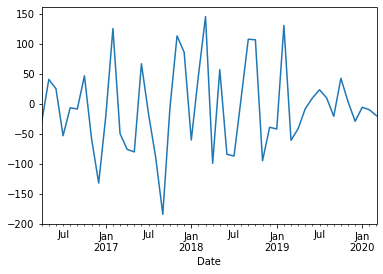

In [51]:
best_model.resid.plot()

<AxesSubplot:xlabel='Date'>

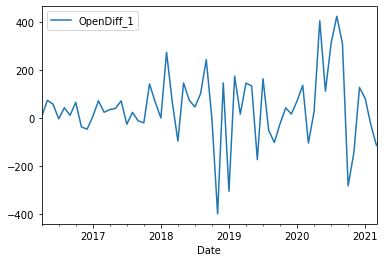

In [52]:
dfN.plot()

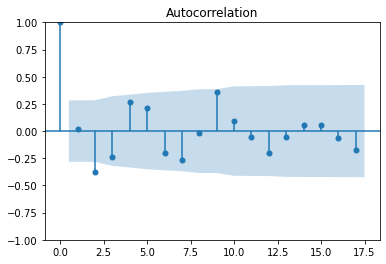

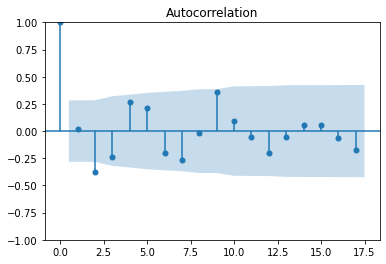

In [53]:
statsmodels.graphics.tsaplots.plot_acf(best_model.resid)

In [54]:
dfN['Model'] = best_model.fittedvalues

In [55]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Date'>

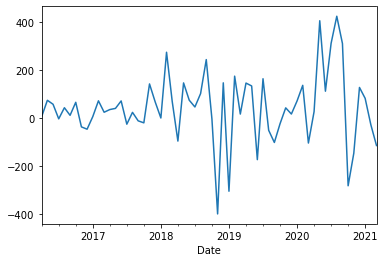

In [56]:
dfN['OpenDiff_1'].plot()

<AxesSubplot:xlabel='Date'>

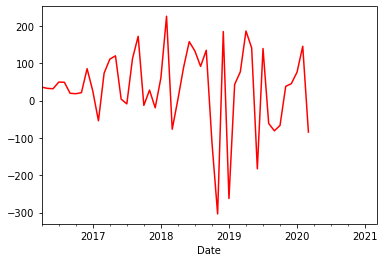

In [57]:
dfN['Model'].plot(c='r')

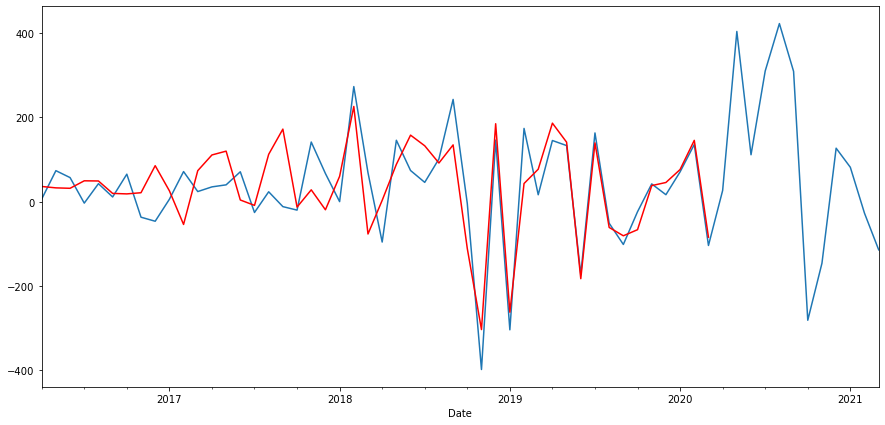

In [58]:
plt.figure(figsize=(15,7))
dfN['OpenDiff_1'].plot()
dfN['Model'].plot(c='r');

In [59]:
import datetime
from dateutil.relativedelta import relativedelta

In [60]:
predict_len = 12

new_open_value = dfN[['OpenDiff_1', 'Model']]
future_date = [
    datetime.datetime.strptime("2021-04-01", "%Y-%m-%d") + relativedelta(months=x)
    for x in range(0, predict_len)
]

In [61]:
future_df = pd.DataFrame(index=future_date, columns=['OpenDiff_1', 'Model'])
new_open_value = pd.concat([new_open_value, future_df])

In [62]:
print(new_open_value.tail(60))

            OpenDiff_1       Model
2017-04-01   34.950012  110.718754
2017-05-01   39.799988  119.765239
2017-06-01   70.790039    3.844081
2017-07-01  -25.800049   -8.940386
2017-08-01   23.320007  112.250285
2017-09-01  -11.909973  172.063538
2017-10-01  -20.200012  -13.022389
2017-11-01  141.400024   27.943887
2017-12-01   66.650024  -19.394988
2018-01-01   -0.050049   60.060129
2018-02-01  273.000000  225.806785
2018-03-01   68.599976  -76.853071
2018-04-01  -95.979980    2.981548
2018-05-01  145.599976   88.403385
2018-06-01   73.810059  157.746547
2018-07-01   45.669922  132.474530
2018-08-01  101.300049   91.577673
2018-09-01  242.500000  134.607570
2018-10-01   -4.510010 -111.326243
2018-11-01 -398.459961 -303.705874
2018-12-01  145.929932  184.819336
2019-01-01 -304.260010 -262.463556
2019-02-01  173.680054   42.949829
2019-03-01   16.250000   76.890228
2019-04-01  144.979980  186.180661
2019-05-01  132.979980  141.030414
2019-06-01 -173.079956 -182.915629
2019-07-01  162.9699

In [63]:
import matplotlib.pyplot as plt

In [64]:
var = 48

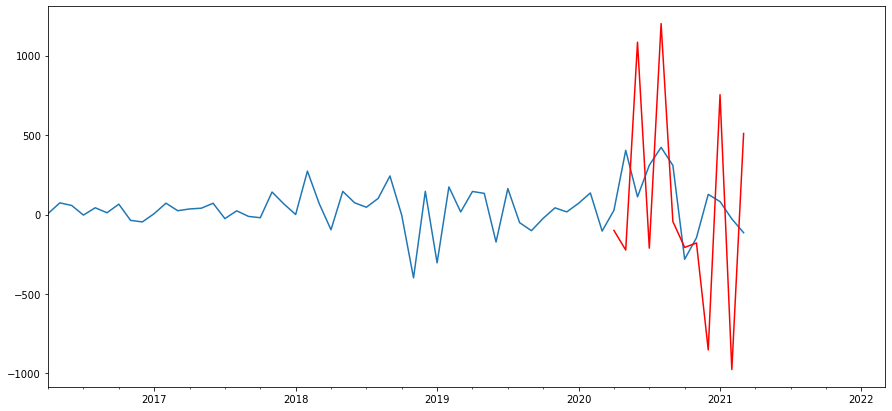

In [65]:
new_open_value['Model'] = best_model.predict(start=var, end=var + predict_len - 1)

plt.figure(figsize=(15,7))
                                  
new_open_value['OpenDiff_1'].plot()
new_open_value['Model'].plot(c='r');

In [66]:
print(new_open_value.tail(15))

            OpenDiff_1       Model
2021-01-01   81.500000  753.824934
2021-02-01  -27.639893 -975.170642
2021-03-01 -114.470215  509.713231
2021-04-01         NaN         NaN
2021-05-01         NaN         NaN
2021-06-01         NaN         NaN
2021-07-01         NaN         NaN
2021-08-01         NaN         NaN
2021-09-01         NaN         NaN
2021-10-01         NaN         NaN
2021-11-01         NaN         NaN
2021-12-01         NaN         NaN
2022-01-01         NaN         NaN
2022-02-01         NaN         NaN
2022-03-01         NaN         NaN


In [67]:
from sklearn.metrics import mean_absolute_percentage_error

In [68]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_percentage_error(y_true, y_pred)

0.3273809523809524

In [69]:
y_true
y_pred

[2.5, 0.0, 2, 8]

In [70]:
new_open_value['Model'][48:60].shape

(12,)

In [71]:
mean_absolute_percentage_error(X_test, new_open_value['Model'][48:60])

6.328537493900913

In [72]:
mean_absolute_percentage_error([2], [4])

1.0

In [73]:
mean_absolute_percentage_error([1], [3])

2.0

In [74]:
mean_absolute_percentage_error([7], [50])

6.142857142857143

In [75]:
  # 1-10 1-10 -- 1 9  -- 1.015 AIC 600
    #            19 1 -- 6 AIC 300 